<a href="https://colab.research.google.com/github/emaantech99/Heart-Disease-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report


In [3]:
# Load the dataset
df = pd.read_csv("/content/HeartDiseaseTrain-Test.csv")

# Preview data
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [4]:
# Check for missing values
print(df.isnull().sum())

# If any missing values (fill or drop)
df = df.dropna()


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


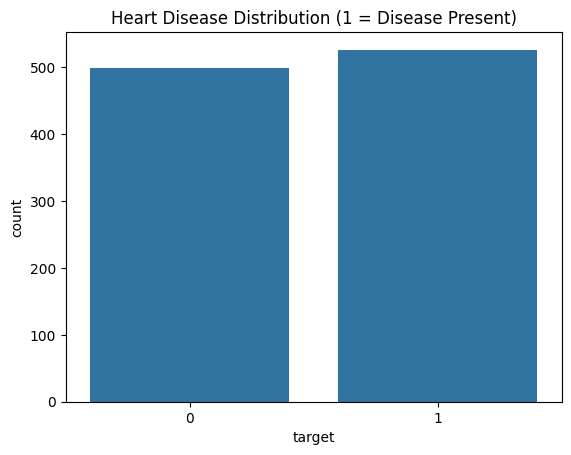

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (1 = Disease Present)")
plt.show()

# Correlation matrix (after encoding later)


In [7]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Encode categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [8]:
# Features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=4)

In [11]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

# Predictions
log_preds = log_reg.predict(X_test_scaled)
tree_preds = tree.predict(X_test_scaled)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

# ROC-AUC
log_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
tree_probs = tree.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_probs))
print("Decision Tree ROC-AUC:", roc_auc_score(y_test, tree_probs))


Logistic Regression Accuracy: 0.7951219512195122
Decision Tree Accuracy: 0.824390243902439
Logistic Regression ROC-AUC: 0.8656006091757091
Decision Tree ROC-AUC: 0.8976775176089853


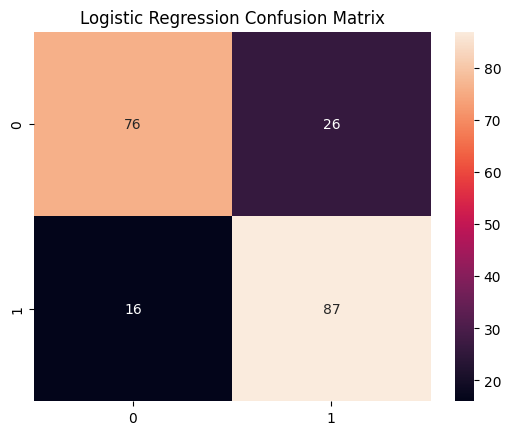

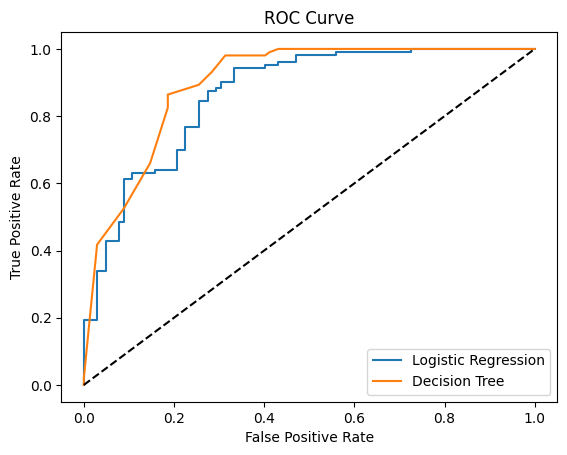

In [12]:
# Confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, log_probs)
fpr2, tpr2, _ = roc_curve(y_test, tree_probs)

plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


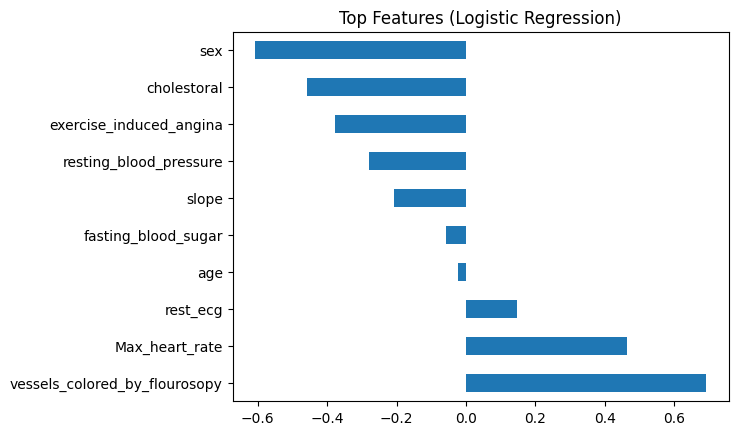

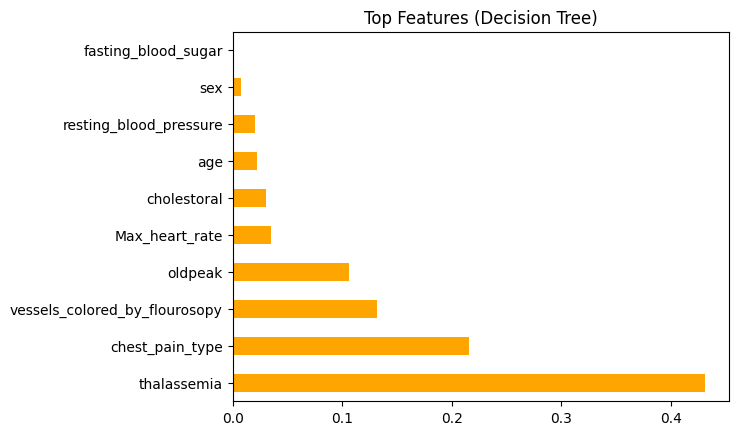

In [13]:
# Logistic Regression Coefficients
import pandas as pd

coef_series = pd.Series(log_reg.coef_[0], index=X.columns)
coef_series.nlargest(10).plot(kind='barh')
plt.title("Top Features (Logistic Regression)")
plt.show()

# Decision Tree Feature Importances
tree_imp = pd.Series(tree.feature_importances_, index=X.columns)
tree_imp.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top Features (Decision Tree)")
plt.show()


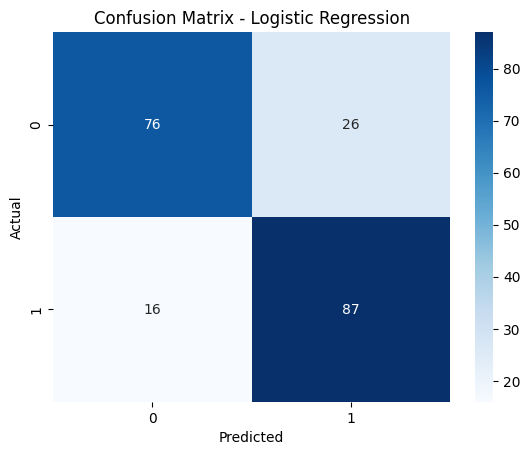

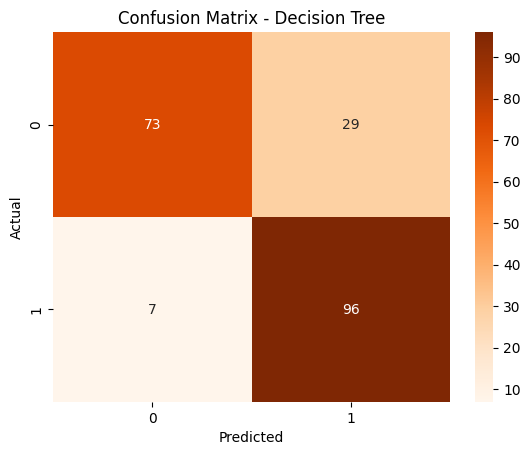

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, log_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Confusion Matrix
sns.heatmap(confusion_matrix(y_test, tree_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


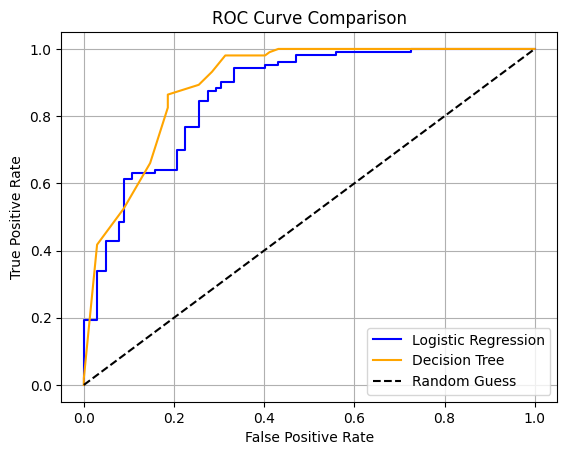

In [15]:
from sklearn.metrics import roc_curve

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)

plt.plot(fpr_log, tpr_log, label='Logistic Regression', color='blue')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()
